In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords

In [321]:
full_ws_df = pd.read_csv("./data/Shakespeare_data.csv")

In [322]:
#Drop rows that are not dialogue
full_ws_df = full_ws_df.loc[full_ws_df["ActSceneLine"].notna()]

In [323]:
full_ws_df["Act"] = full_ws_df['ActSceneLine'].astype(str).str[0]

In [324]:
full_ws_df.drop(axis=1, labels=["Dataline", "PlayerLinenumber", "Player", "ActSceneLine"], inplace=True)

In [325]:
full_ws_df["Shakespeare"] = 1

In [326]:
full_ws_df = full_ws_df.rename(columns={"PlayerLine":"Line"})

In [327]:
othello = full_ws_df.loc[full_ws_df["Play"] == "Othello"]
king_lear = full_ws_df.loc[full_ws_df["Play"] == "King Lear"]
antony_and_cleopatra = full_ws_df.loc[full_ws_df["Play"] == "Antony and Cleopatra"]
coriolanus = full_ws_df.loc[full_ws_df["Play"] == "Coriolanus"]
timon = full_ws_df.loc[full_ws_df["Play"] == "Timon of Athens"]

In [328]:
s_df = full_ws_df.loc[full_ws_df["Play"].isin(
    ["Othello", "King Lear", "Antony and Cleopatra", "Coriolanus"])]

In [329]:
s_df.drop(axis=1, labels="Play")
timon.drop(axis=1, labels="Play", inplace=True)

C:\Users\drewh\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [330]:
trick = pd.read_csv("./data/a_trick_to_catch_the_old_one.csv")
phoenix = pd.read_csv("./data/the_phoenix.csv")
puritan = pd.read_csv("./data/the_puritan.csv")
revengers = pd.read_csv("./data/the_revengers_tragedy.csv")
gallants = pd.read_csv("./data/your_five_gallants.csv")

In [331]:
m_df = pd.concat([trick, phoenix, puritan, revengers, gallants])

In [332]:
m_df["Shakespeare"] = 0

In [333]:
df = pd.concat([s_df, m_df])

In [334]:
X_train, X_test, y_train, y_test = train_test_split(df["Line"], df["Shakespeare"], train_size=.9, random_state=96)

In [335]:
stoplist = stopwords.words('english')

## Modeling

#### Baseline Vectorizer, Dummy Classifier

In [16]:
tfidf_baseline = TfidfVectorizer(token_pattern=r"(?u)\b[A-Za-z]+\b",stop_words = stoplist)
baseline_vectorized = tfidf_baseline.fit_transform(X_train)

In [17]:
dummy = DummyClassifier(strategy="most_frequent")

In [18]:
dummy.fit(baseline_vectorized, y_train)
dummy_score = dummy.score(baseline_vectorized, y_train)
print(dummy_score)

0.6199082042455536


#### Iteration 1: Overfit Decision Tree

In [19]:
dt = DecisionTreeClassifier()

In [20]:
dt_cv = cross_val_score(dt, baseline_vectorized, y_train)
dt_cv.mean()

0.715193759773352

In [21]:
dt.fit(baseline_vectorized, y_train)
dt_train_score = dt.score(baseline_vectorized, y_train)
print(dt_train_score)

0.9812583668005355


#### Iteration 2: Multinomial NB

In [22]:
nb = MultinomialNB()

In [23]:
nb_cv = cross_val_score(nb, baseline_vectorized, y_train)
nb_cv.mean()

0.7662551212249893

In [24]:
nb.fit(baseline_vectorized, y_train)
nb_train_score = nb.score(baseline_vectorized, y_train)
print(nb_train_score)

0.8444253203289348


#### Iteration 3: Random Forest

In [25]:
rf = RandomForestClassifier()

In [26]:
rf_cv = cross_val_score(rf, baseline_vectorized, y_train)
rf_cv.mean()

0.749856253733929

In [27]:
rf.fit(baseline_vectorized, y_train)
rf1_train_score = rf.score(baseline_vectorized, y_train)
print(rf1_train_score)

0.9812583668005355


#### Iteration 4: SVC

In [28]:
svc = SVC()

In [29]:
svc_cv = cross_val_score(svc, baseline_vectorized, y_train)
svc_cv.mean()

0.7659682343492668

In [30]:
svc.fit(baseline_vectorized, y_train)
svc_train_score = svc.score(baseline_vectorized, y_train)
print(svc_train_score)

0.9359342130426468


#### Iteration 5: Modifying Vectorizer

In [31]:
tfidf_2 = TfidfVectorizer(token_pattern = r"(?u)\b[A-Za-z]+\b",
                          stop_words = stoplist,
                          ngram_range=(1, 2),
                          min_df=5,
                         )
vectorized_2 = tfidf_2.fit_transform(X_train)

In [32]:
nb_cv2 = cross_val_score(nb, vectorized_2, y_train)
nb_cv2.mean()

0.7605658590790639

In [33]:
nb.fit(vectorized_2, y_train)
nb_train_score2 = nb.score(vectorized_2, y_train)
print(nb_train_score2)

0.805698986421878


In [34]:
rf_cv2 = cross_val_score(rf, vectorized_2, y_train)
rf_cv2.mean()

0.7406767650542189

In [35]:
rf.fit(vectorized_2, y_train)
rf_train_score2 = rf.score(vectorized_2, y_train)
print(rf_train_score2)

0.9653853509275196


In [36]:
svc_cv2 = cross_val_score(svc, vectorized_2, y_train)
svc_cv2.mean()

0.7602788350735862

In [37]:
svc.fit(vectorized_2, y_train)
svc_train_score2 = svc.score(vectorized_2, y_train)
print(svc_train_score2)

0.9016064257028112


#### Iteration 6: Random Forest Hyperparameters

In [38]:
grid_rf1 = {"n_estimators":[100, 200, 300],
           "criterion": ["gini", "entropy", "log_loss"],
           "max_features": ["sqrt", "auto"],
           "max_depth" : [10,20,30,None],
            "min_samples_leaf" : [1,2,4],
            "min_samples_split": [2,5,10]
            }
GS_rf1 = GridSearchCV(
    estimator=rf,
    param_grid=grid_rf1,
    verbose=2,
    n_jobs=-1)

In [39]:
# GS_rf1.fit(vectorized_2, y_train)

In [40]:
# GS_rf1.best_params_

{'criterion': 'entropy',

 'max_depth': None,
 
 'max_features': 'auto',
 
 'min_samples_leaf': 2,
 
 'min_samples_split': 5,
 
 'n_estimators': 300}

In [41]:
# GS_rf1.best_score_

0.74598373229712

In [42]:
grid_rf2 = {"n_estimators":[250, 300, 400],
           "criterion": ["entropy"],
           "max_features": ["auto"],
           "max_depth" : [None],
            "min_samples_leaf" : [2, 3],
            "min_samples_split": [3, 5, 7]
            }
GS_rf2 = GridSearchCV(
    estimator=rf,
    param_grid=grid_rf2,
    verbose=2,
    n_jobs=-1)

In [43]:
# GS_rf2.fit(vectorized_2, y_train)

In [44]:
# GS_rf2.best_params_

{'criterion': 'entropy',

 'max_depth': None,
 
 'max_features': 'auto',
 
 'min_samples_leaf': 2,
 
 'min_samples_split': 7,
 
 'n_estimators': 400}

In [45]:
# GS_rf2.best_score_

0.7456011745620648


In [46]:
grid_rf3 = {"n_estimators":[400, 700, 1000],
           "criterion": ["entropy"],
           "max_features": ["auto"],
           "max_depth" : [None],
            "min_samples_leaf" : [2],
            "min_samples_split": [6, 7, 8]
            }
GS_rf3 = GridSearchCV(
    estimator=rf,
    param_grid=grid_rf3,
    verbose=2,
    n_jobs=-1)

In [47]:
# GS_rf3.fit(vectorized_2, y_train)

In [48]:
# GS_rf3.best_params_

{'criterion': 'entropy',

 'max_depth': None,
 
 'max_features': 'auto',
 
 'min_samples_leaf': 2,
 
 'min_samples_split': 6,
 
 'n_estimators': 1000}

In [49]:
# GS_rf3.best_score_

0.7454577939753413

After these gridsearches, our accuracy score does not seem to be improving.

#### Iteration 7: SVC Gridsearch

In [50]:
C_exps = list(range(-5, 17, 2))
gamma_exps = list(range(-15, 5, 2))

In [51]:
C_values = []
for exp in C_exps:
    C_values.append(2**exp)
gamma_values = []
for exp in gamma_exps:
    gamma_values.append(2**exp)

In [52]:
grid_svc1 = {"C": C_values,
             "kernel": ["rbf"],
             "gamma": gamma_values
            }
GS_svc = GridSearchCV(
    estimator=svc,
    param_grid=grid_svc1,
    verbose=2,
    n_jobs=-1)

In [53]:
# GS_svc.fit(vectorized_2, y_train)

In [54]:
# GS_svc.best_params_

{'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}

In [55]:
# GS_svc.best_score_

0.7619523323257343

In [56]:
grid_svc2 = {"C": [0.5, 1, 2, 3],
             "kernel": ["rbf"],
             "gamma": [0.25, 0.5, 0.75, 1]
            }
GS_svc2 = GridSearchCV(
    estimator=svc,
    param_grid=grid_svc2,
    verbose=2,
    n_jobs=-1)

In [57]:
# GS_svc2.fit(vectorized_2, y_train)

In [58]:
# GS_svc2.best_params_

{'C': 2, 'gamma': 0.75, 'kernel': 'rbf'}

In [59]:
# GS_svc2.best_score_

0.7620000763355639

### Running Final Model on Test Set

In [60]:
final_model = nb

In [61]:
test_vec = tfidf_2.transform(X_test)

In [62]:
test_pred = final_model.predict(test_vec)
recall_score(y_test, test_pred)

0.9216783216783216

In [63]:
accuracy_score(y_test, test_pred)

0.7763440860215054

In [64]:
precision_score(y_test, test_pred)

0.7636152954808807

In [376]:
cm = confusion_matrix(y_test, test_pred)
cmd = ConfusionMatrixDisplay(cm)

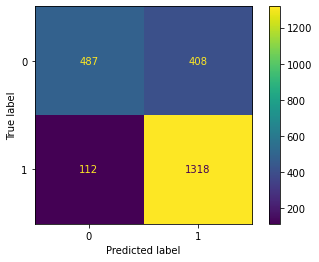

In [379]:
cmd.plot();
# plt.savefig("./Graphs/confusion_matrix.png", transparent=True);

## Visualizations

#### Timon of Athens

In [242]:
timon_vec = tfidf_2.transform(timon["Line"])

In [243]:
timon_probs = list(final_model.predict_proba(timon_vec))
timon_probs_s = []
for pair in timon_probs:
    timon_probs_s.append(pair[1]*100)
timon_probs_s_series = pd.Series(timon_probs_s)
rolmean_timon = timon_probs_s_series.rolling(window=25).mean()

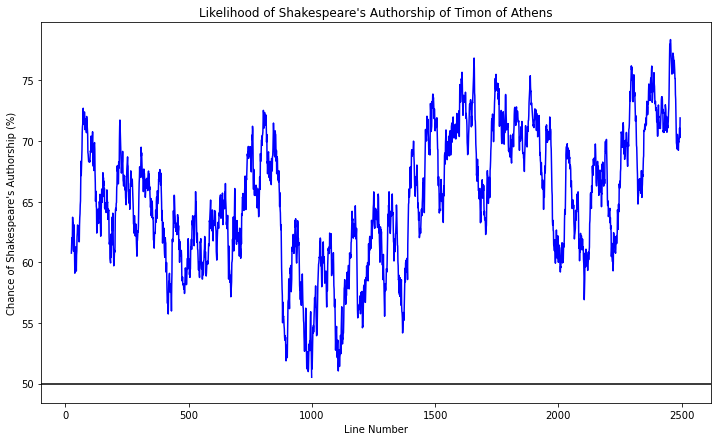

In [368]:
fig = plt.figure(figsize=(12, 7))
plt.plot(np.where(rolmean_timon > 50, rolmean_timon, None), color="blue", label="1")
plt.plot(np.where(rolmean_timon < 50, rolmean_timon, None), color="red", label="2")
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of Timon of Athens");
# plt.savefig("./Graphs/timon.png", transparent=True, dpi=600);

### Training Set Plays

#### Othello

In [246]:
othello_vec = tfidf_2.transform(othello["Line"])

In [247]:
othello_probs = list(final_model.predict_proba(othello_vec))
othello_probs_s = []
for pair in othello_probs:
    othello_probs_s.append(pair[1]*100)
othello_probs_s_series = pd.Series(othello_probs_s)
rolmean_othello = othello_probs_s_series.rolling(window=25).mean()

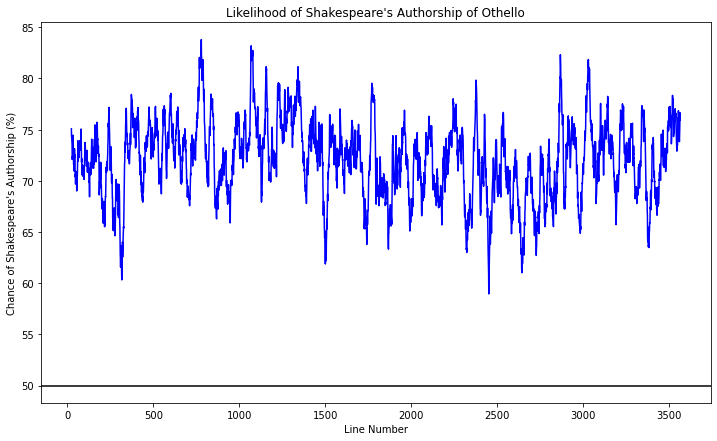

In [367]:
fig = plt.figure(figsize=(12, 7))
plt.plot(rolmean_othello, color='blue')
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of Othello");
# plt.savefig("./Graphs/othello.png", transparent=True, dpi=600);

In [249]:
lear_vec = tfidf_2.transform(king_lear["Line"])

In [250]:
lear_probs = list(final_model.predict_proba(lear_vec))
lear_probs_s = []
for pair in lear_probs:
    lear_probs_s.append(pair[1]*100)
lear_probs_s_series = pd.Series(lear_probs_s)
rolmean_lear = lear_probs_s_series.rolling(window=25).mean()

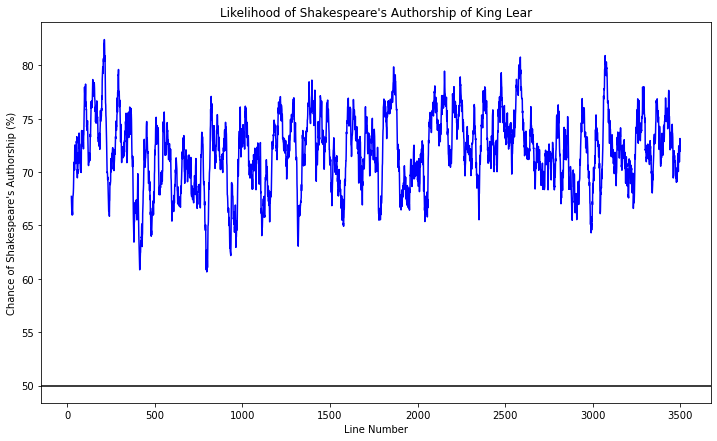

In [366]:
fig = plt.figure(figsize=(12, 7))
plt.plot(rolmean_lear, color='blue')
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of King Lear");
# plt.savefig("./Graphs/lear.png", transparent=True, dpi=600);

In [252]:
ac_vec = tfidf_2.transform(antony_and_cleopatra["Line"])

In [253]:
ac_probs = list(final_model.predict_proba(ac_vec))
ac_probs_s = []
for pair in ac_probs:
    ac_probs_s.append(pair[1]*100)
ac_probs_s_series = pd.Series(ac_probs_s)
rolmean_ac = ac_probs_s_series.rolling(window=25).mean()

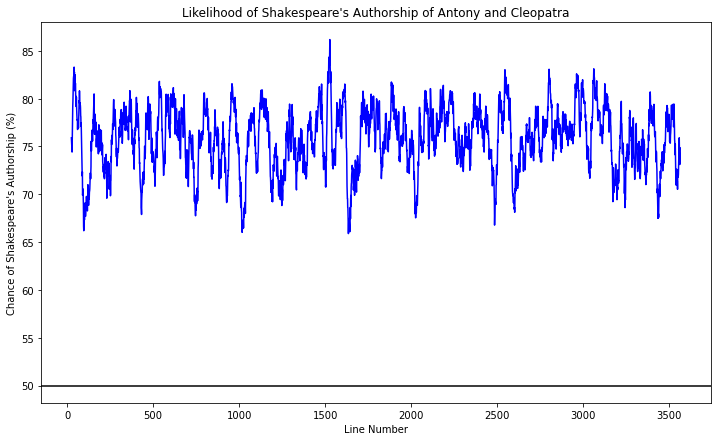

In [365]:
fig = plt.figure(figsize=(12, 7))
plt.plot(rolmean_ac, color='blue')
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of Antony and Cleopatra");
# plt.savefig("./Graphs/antony_cleopatra.png", transparent=True, dpi=600);

In [255]:
cor_vec = tfidf_2.transform(coriolanus["Line"])

In [256]:
cor_probs = list(final_model.predict_proba(cor_vec))
cor_probs_s = []
for pair in cor_probs:
    cor_probs_s.append(pair[1]*100)
cor_probs_s_series = pd.Series(cor_probs_s)
rolmean_cor = cor_probs_s_series.rolling(window=25).mean()

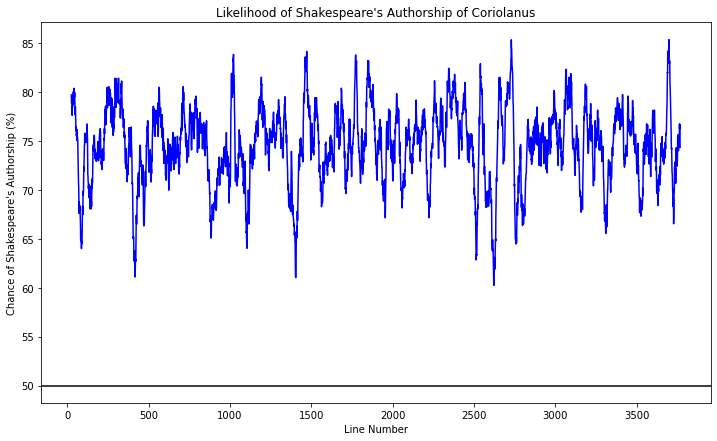

In [364]:
fig = plt.figure(figsize=(12, 7))
plt.plot(rolmean_cor, color='blue')
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of Coriolanus");
# plt.savefig("./Graphs/coriolanus.png", transparent=True, dpi=600);

In [258]:
trick_vec = tfidf_2.transform(trick["Line"])

In [259]:
trick_probs = list(final_model.predict_proba(trick_vec))
trick_probs_s = []
for pair in trick_probs:
    trick_probs_s.append(pair[1]*100)
trick_probs_s_series = pd.Series(trick_probs_s)
rolmean_trick = trick_probs_s_series.rolling(window=25).mean()

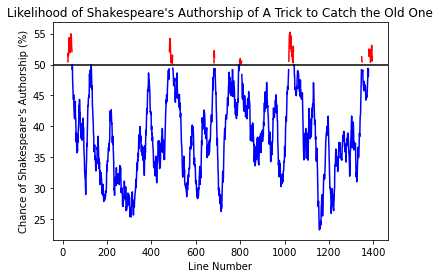

In [363]:
fig, ax = plt.subplots()
plt.plot(np.where(rolmean_trick > 50, rolmean_trick, None), color="red", label="1")
plt.plot(np.where(rolmean_trick < 50, rolmean_trick, None), color="blue", label="2")
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of A Trick to Catch the Old One");
# plt.savefig("./Graphs/trick.png", transparent=True, dpi=600);

In [264]:
phoenix_vec = tfidf_2.transform(phoenix["Line"])

In [265]:
phoenix_probs = list(final_model.predict_proba(phoenix_vec))
phoenix_probs_s = []
for pair in phoenix_probs:
    phoenix_probs_s.append(pair[1]*100)
phoenix_probs_s_series = pd.Series(phoenix_probs_s)
rolmean_phoenix = phoenix_probs_s_series.rolling(window=25).mean()

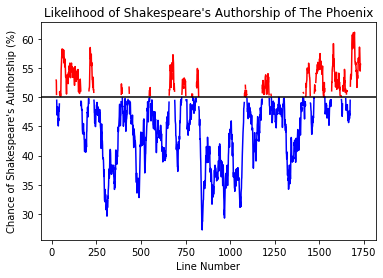

In [361]:
fig, ax = plt.subplots()
plt.plot(np.where(rolmean_phoenix > 50, rolmean_phoenix, None), color="red", label="1")
plt.plot(np.where(rolmean_phoenix < 50, rolmean_phoenix, None), color="blue", label="2")
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of The Phoenix");
# plt.savefig("./Graphs/phoenix.png", transparent=True, dpi=600);

In [270]:
puritan_vec = tfidf_2.transform(puritan["Line"])

In [271]:
puritan_probs = list(final_model.predict_proba(puritan_vec))
puritan_probs_s = []
for pair in puritan_probs:
    puritan_probs_s.append(pair[1]*100)
puritan_probs_s_series = pd.Series(puritan_probs_s)
rolmean_puritan = puritan_probs_s_series.rolling(window=25).mean()

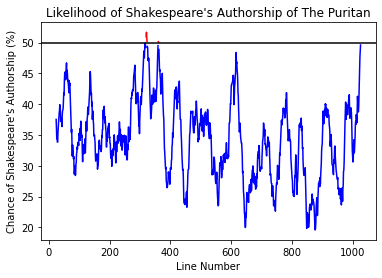

In [360]:
fig, ax = plt.subplots()
plt.plot(np.where(rolmean_puritan > 50, rolmean_puritan, None), color="red", label="1")
plt.plot(np.where(rolmean_puritan < 50, rolmean_puritan, None), color="blue", label="2")
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of The Puritan");
# plt.savefig("./Graphs/puritan.png", transparent=True, dpi=600);

In [273]:
revengers_vec = tfidf_2.transform(revengers["Line"])

In [274]:
revengers_probs = list(final_model.predict_proba(revengers_vec))
revengers_probs_s = []
for pair in revengers_probs:
    revengers_probs_s.append(pair[1]*100)
revengers_probs_s_series = pd.Series(revengers_probs_s)
rolmean_revengers = revengers_probs_s_series.rolling(window=25).mean()

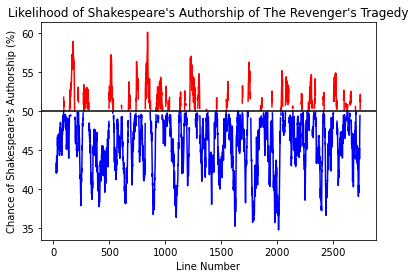

In [359]:
fig, ax = plt.subplots()
plt.plot(np.where(rolmean_revengers > 50, rolmean_revengers, None), color="red", label="1")
plt.plot(np.where(rolmean_revengers < 50, rolmean_revengers, None), color="blue", label="2")
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of The Revenger's Tragedy");
# plt.savefig("./Graphs/revengers.png", transparent=True, dpi=600);

In [276]:
gallants_vec = tfidf_2.transform(gallants["Line"])

In [277]:
gallants_probs = list(final_model.predict_proba(gallants_vec))
gallants_probs_s = []
for pair in gallants_probs:
    gallants_probs_s.append(pair[1]*100)
gallants_probs_s_series = pd.Series(gallants_probs_s)
rolmean_gallants = gallants_probs_s_series.rolling(window=25).mean()

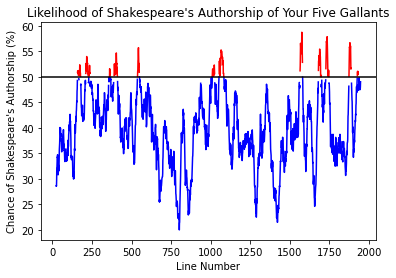

In [358]:
fig, ax = plt.subplots()
plt.plot(np.where(rolmean_gallants > 50, rolmean_gallants, None), color="red", label="1")
plt.plot(np.where(rolmean_gallants < 50, rolmean_gallants, None), color="blue", label="2")
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of Your Five Gallants");
# plt.savefig("./Graphs/gallants.png", transparent=True, dpi=600);

## Test on Unseen Data: All's Well That Ends Well

In [286]:
alls = full_ws_df.loc[full_ws_df["Play"] == "Alls well that ends well"]

In [288]:
alls_vec = tfidf_2.transform(alls["Line"])

In [289]:
alls_probs = list(final_model.predict_proba(alls_vec))
alls_probs_s = []
for pair in alls_probs:
    alls_probs_s.append(pair[1]*100)
alls_probs_s_series = pd.Series(alls_probs_s)
rolmean_alls = alls_probs_s_series.rolling(window=25).mean()

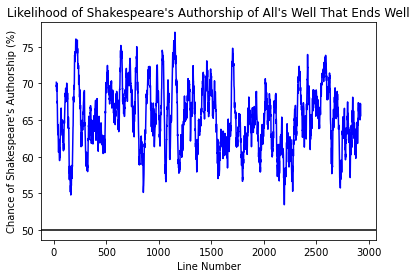

In [357]:
fig, ax = plt.subplots()
plt.plot(np.where(rolmean_alls > 50, rolmean_alls, None), color="blue", label="1")
plt.plot(np.where(rolmean_alls < 50, rolmean_alls, None), color="red", label="2")
plt.axhline(y=50, color="black")
plt.ylabel("Chance of Shakespeare's Authorship (%)")
plt.xlabel("Line Number")
plt.title("Likelihood of Shakespeare's Authorship of All's Well That Ends Well");
# plt.savefig("./Graphs/Alls_Well.png", transparent=True, dpi=600);

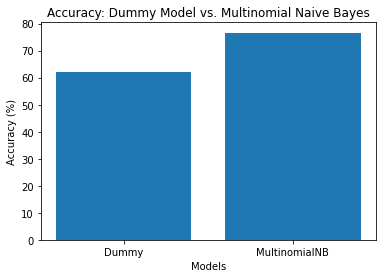

In [356]:
models=["Dummy", "MultinomialNB"]
accs=[dummy_score*100, nb_cv.mean()*100]
fig, ax = plt.subplots()
ax.bar(models, accs)
plt.title("Accuracy: Dummy Model vs. Multinomial Naive Bayes")
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
# plt.savefig("./Graphs/model_accuracy.png", transparent=True, dpi=600);